In [1]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import random

%matplotlib inline

### Create the dataset

- The DNA quantity of every run is already known to us.
- Since we want to study the base qualities and read lengths of the raw data, we need to extract them as features.

In [2]:
# DNA quantity:
# 0.fastq - SRR7343395: 310
# 1.fastq - SRR7343396: 204.5
# 2.fastq - SRR7401973: 106
# 3.fastq - SRR7343398: 288
# 4.fastq - SRR7343403: 118 + 128.5 = 246.5
# 5.fastq - SRR7343404: 147.5 + 103 = 250.5
# 6.fastq - SRR7343405: 237.5
# 7.fastq - SRR7343406: 72.5
# 8.fastq - SRR7343407: 402 + 113 = 515

DNA_q0 = 310
DNA_q1 = 204.5
DNA_q2 = 106
DNA_q3 = 288
DNA_q4 = 246.5
DNA_q5 = 250.5
DNA_q6 = 237.5
DNA_q7 = 72.5
DNA_q8 = 515

y = np.array([DNA_q0, DNA_q1, DNA_q2, DNA_q3, DNA_q4, DNA_q5, DNA_q6, DNA_q7, DNA_q8])
y

array([310. , 204.5, 106. , 288. , 246.5, 250.5, 237.5,  72.5, 515. ])

In [3]:
num_of_runs = 9

In [4]:
# Load the fastq files and store the features in variable x

# features
x = np.zeros([num_of_runs, 4])

# all base qualities and all read lengths of every read in every run
all_bq = []
all_rl = []

for j in range(num_of_runs): 

    base_qualities = []
    read_lengths = []

    # load data
    with open("RawData/2D/"+str(j)+".fastq") as handle:
        for record in SeqIO.parse(handle, "fastq"):
            # base quality of every read
            base_quality = np.mean(record.letter_annotations["phred_quality"])
            base_qualities.append(base_quality)
            # read length of every read
            read_length = len(record.seq)
            read_lengths.append(read_length)

    # mean base quality of the run 
    mean_quality = np.mean(base_qualities)
    # mean read length of the run
    mean_length = np.mean(read_lengths)

    # variance of base quality of the run 
    var_quality = np.var(base_qualities)
    # variance read length of the run
    var_length = np.var(read_lengths)
    
    all_bq.append(base_qualities)
    all_rl.append(read_lengths)

    x[j] = np.array([mean_quality, mean_length, var_quality, var_length])

In [5]:
def display_data(x):
    pd.set_option('display.width', 5000)
    df = pd.DataFrame({'base quality mean': x[:, 0], 
                   'read length mean': x[:, 1],
                   'base quality variance': x[:, 2], 
                   'read length variance': x[:, 3],
                   'DNA concentration': y
                  })
    return df

In [6]:
# display data in a DataFrame

display_data(x)

,base quality mean,read length mean,base quality variance,read length variance,DNA concentration
0,10.649625,11371.326353,6.920581,5.583067e+07,310.0
1,20.237260,5117.113171,21.325409,7.984252e+06,204.5
2,21.595511,8212.004106,7.971051,1.840589e+07,106.0
3,21.584779,3226.163073,23.105699,4.241699e+06,288.0
4,17.777785,6916.368743,15.167208,1.344016e+07,246.5
5,18.401681,7276.038009,13.572328,1.281333e+07,250.5
6,18.784899,4877.043711,26.086871,4.876989e+06,237.5
7,22.360574,5611.978021,20.754681,1.153530e+07,72.5
8,11.407123,12241.148360,5.458040,5.881444e+07,515.0


In [7]:
# Since it takes a while to load the fastq files but what we need as the features is quite simple, 
# it is practical to simply store the feature data in the data.txt file. Then we can load from this txt
# file when we want to get the data

np.savetxt('data_2D.txt', x) 

In [8]:
# test loading the data
x2 = np.loadtxt('data_2D.txt')
print(x == x2)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


### Distribution of the features
We visualize the data distribution of the two features. Every run is represented by a curve with different colors. 

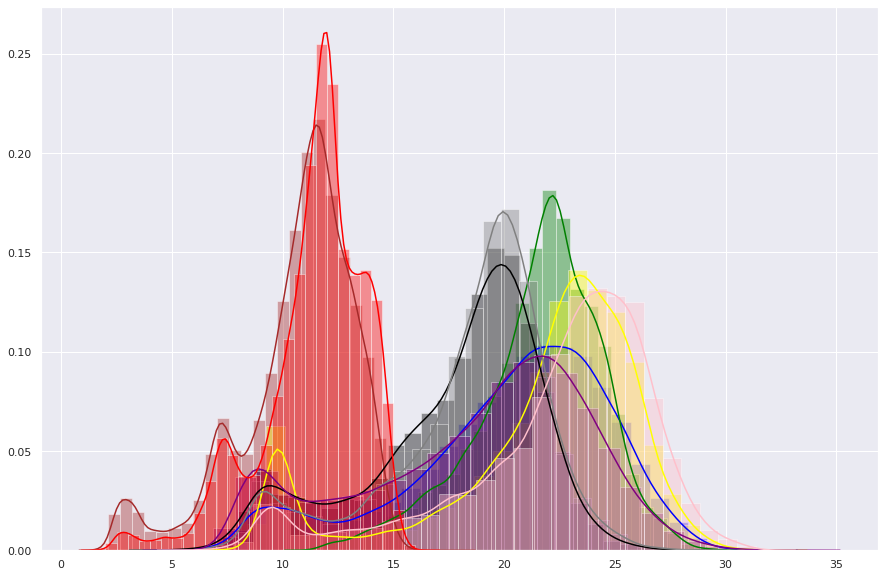

In [9]:
import seaborn as sns 

sns.set_palette("hls") #hls color space
sns.set(rc={'figure.figsize':(15,10)})
colors = ["brown","blue","green","yellow","black","gray","purple","pink","red"]

# distribution of base qualities
for i in range(num_of_runs):
    sns.distplot(all_bq[i],color=colors[i],bins=30,kde=True)
plt.show()

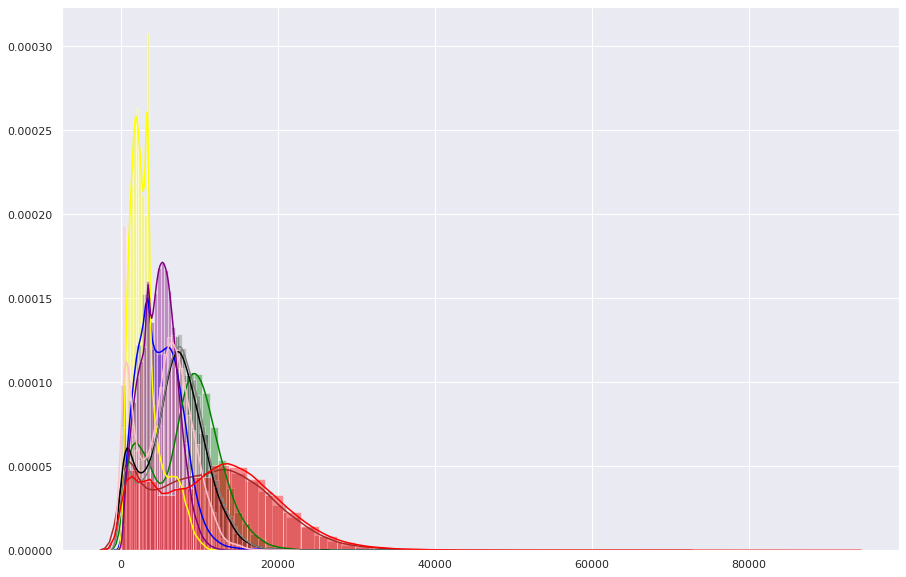

In [10]:
sns.set(rc={'figure.figsize':(15,10)})

# distribution of read lengths
for i in range(num_of_runs):
    sns.distplot(all_rl[i],color=colors[i],bins=40,kde=True)
plt.show()

### Calculate the correlation between base qualities and the DNA quantity

Take every run as a data point. Calculate the correlation between the mean of base qualities and the DNA quantity.

Pearsons correlation: -0.788


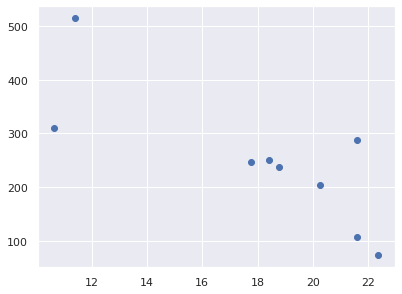

In [11]:
# Calculate the correlation between the mean of base qualities and the DNA quantity
corr, _ = pearsonr(x[:,0], y)
print('Pearsons correlation: %.3f' % corr)

# Plot the data
sns.set(rc={'figure.figsize':(6.4, 4.8)})
plt.scatter(x[:,0], y)
plt.show()

Pearsons correlation: -0.403


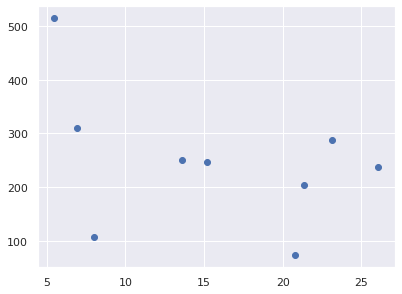

In [12]:
# Calculate the correlation between the variance of base qualities and the DNA quantity
corr, _ = pearsonr(x[:,2], y)
print('Pearsons correlation: %.3f' % corr)

# Plot the data
plt.scatter(x[:,2], y)
plt.show()

### Calculate the correlation between read lengths and the DNA quantity

Take every run as a data point. Calculate the correlation between the mean of read lengths and the DNA quantity.

Pearsons correlation: 0.555


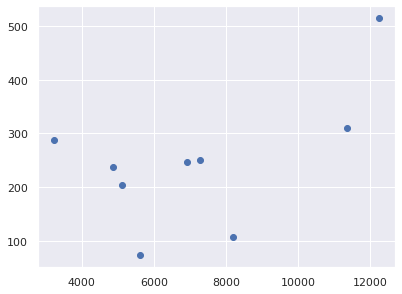

In [13]:
# Calculate the correlation between the mean of read lengths and the DNA quantity
corr, _ = pearsonr(x[:,1], y)
print('Pearsons correlation: %.3f' % corr)

plt.scatter(x[:,1], y)
plt.show()

Pearsons correlation: 0.666


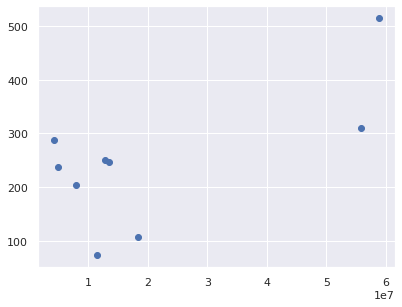

In [14]:
# Calculate the correlation between the variance of read lengths and the DNA quantity
corr, _ = pearsonr(x[:,3], y)
print('Pearsons correlation: %.3f' % corr)

plt.scatter(x[:,3], y)
plt.show()

### Analyze the relationship of all the features and the DNA quantity

In [15]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

### Aproach 1
Given that only 9 data points are available, the model performance may be impacted due to the lack of data. So it is worth trying to split data in every run into 80% training data and 20% validation data, so that the number of traning data points won't be reduced. 

In [16]:
num_of_runs = 9
x_train = np.zeros([num_of_runs, 4])
x_val = np.zeros([num_of_runs, 4])

for j in range(num_of_runs): 
    
    train_base_qualities = []
    train_read_lengths = []
    
    val_base_qualities = []
    val_read_lengths = []

    # load data
    with open("RawData/2D/"+str(j)+".fastq") as handle:
        for record in SeqIO.parse(handle, "fastq"):
            # base quality of every read
            base_quality = np.mean(record.letter_annotations["phred_quality"])
            # read length of every read
            read_length = len(record.seq)
            
            # 80% training data
            if random.randint(0,9) < 8:
                train_base_qualities.append(base_quality)
                train_read_lengths.append(read_length)

            # 20% validation data
            else:
                val_base_qualities.append(base_quality)
                val_read_lengths.append(read_length)
            
    # for training data    
    # mean base quality of the run 
    train_mean_quality = np.mean(train_base_qualities)
    # mean read length of the run
    train_mean_length = np.mean(train_read_lengths)

    # variance of base quality of the run 
    train_var_quality = np.var(train_base_qualities)
    # variance read length of the run
    train_var_length = np.var(train_read_lengths)
    
    # for validation data
     # mean base quality of the run 
    val_mean_quality = np.mean(val_base_qualities)
    # mean read length of the run
    val_mean_length = np.mean(val_read_lengths)

    # variance of base quality of the run 
    val_var_quality = np.var(val_base_qualities)
    # variance read length of the run
    val_var_length = np.var(val_read_lengths)
        
       
    x_train[j] = np.array([train_mean_quality, train_mean_length, train_var_quality, train_var_length])
    x_val[j] = np.array([val_mean_quality, val_mean_length, val_var_quality, val_var_length])

In [147]:
display_data(x_train)

,base quality mean,read length mean,base quality variance,read length variance,DNA concentration
0,10.655775,11368.556391,6.894359,5.570652e+07,310.0
1,20.234946,5116.048623,21.220804,7.943359e+06,204.5
2,21.603950,8186.054518,7.928176,1.838917e+07,106.0
3,21.582842,3225.528771,23.037436,4.228817e+06,288.0
4,17.813190,6922.400333,15.014869,1.337138e+07,246.5
5,18.399243,7261.652701,13.662034,1.276695e+07,250.5
6,18.782536,4873.083063,26.135103,4.868104e+06,237.5
7,22.337721,5586.713597,20.756587,1.149380e+07,72.5
8,11.410064,12230.188228,5.471468,5.883931e+07,515.0


In [148]:
display_data(x_val)

,base quality mean,read length mean,base quality variance,read length variance,DNA concentration
0,10.625029,11382.403723,7.024690,5.632704e+07,310.0
1,20.246495,5121.360886,21.742696,8.147400e+06,204.5
2,21.560644,8319.218534,8.146688,1.846067e+07,106.0
3,21.592436,3228.670856,23.375514,4.292623e+06,288.0
4,17.646430,6893.991090,15.710493,1.369467e+07,246.5
5,18.411238,7332.440376,13.220494,1.299121e+07,250.5
6,18.794341,4892.865372,25.894085,4.912173e+06,237.5
7,22.448534,5709.217922,20.737597,1.168313e+07,72.5
8,11.395257,12285.358598,5.403699,5.871169e+07,515.0


 ### Standardize features 

In [153]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x_train = st.fit_transform(x_train)
x_val = st.transform(x_val)

In [154]:
# store the training data and validation data
np.savetxt('standardized_training_data_2D.txt', x_train) 
np.savetxt('standardized_validation_data_2D.txt', x_val) 

In [155]:
display_data(x_train)

,base quality mean,read length mean,base quality variance,read length variance,DNA concentration
0,-1.835207,1.476113,-1.205779,1.750055,310.0
1,0.529137,-0.736185,0.785608,-0.647683,204.5
2,0.867036,0.350062,-1.062078,-0.123297,106.0
3,0.861827,-1.405099,1.038121,-0.834155,288.0
4,-0.068604,-0.097051,-0.077022,-0.375193,246.5
5,0.076046,0.022985,-0.265067,-0.405536,250.5
6,0.170651,-0.822152,1.468699,-0.802063,237.5
7,1.048147,-0.569652,0.721081,-0.469449,72.5
8,-1.649033,1.780980,-1.403562,1.907323,515.0


In [156]:
display_data(x_val)

,base quality mean,read length mean,base quality variance,read length variance,DNA concentration
0,-1.842796,1.481012,-1.187663,1.781206,310.0
1,0.531988,-0.734305,0.858151,-0.637440,204.5
2,0.856348,0.397179,-1.031704,-0.119708,106.0
3,0.864195,-1.403988,1.085114,-0.830952,288.0
4,-0.109764,-0.107103,0.019670,-0.358964,246.5
5,0.079007,0.048031,-0.326442,-0.394278,250.5
6,0.173565,-0.815153,1.435197,-0.799851,237.5
7,1.075498,-0.526306,0.718441,-0.459945,72.5
8,-1.652687,1.800501,-1.412982,1.900916,515.0


### Analyze with machine learning models

In [5]:
from sklearn.metrics import mean_squared_error as MSE

In [6]:
# create a data frame to record and compare how well different models perform.

models_df = pd.DataFrame(columns = ["model", "R^2", "MSE"])
models_df

,model,R^2,MSE


In [7]:
from sklearn import tree
from sklearn import linear_model
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

models = [tree.DecisionTreeRegressor(), 
          linear_model.LinearRegression(), 
          neighbors.KNeighborsRegressor(), 
          ensemble.RandomForestRegressor(n_estimators=20),
          ensemble.AdaBoostRegressor(n_estimators=50),
          ensemble.GradientBoostingRegressor(n_estimators=100),
          BaggingRegressor(),
          ExtraTreeRegressor()
         ]

model_names = ["decision tree", "linear regression", "KNN", "random forest 20", "ada boost 50", 
               "gradient boosting 100", "bagging", "extra tree"]

In [11]:
def try_different_method(model, modelName):
    model.fit(x_train,y)
    score = model.score(x_val, y)    
    result = model.predict(x_val)
    mse = MSE(result,y)
    new_df = models_df.append({'model': modelName, 'R^2': score, 'MSE':mse}, ignore_index=True) 
    return new_df, result, score

,model,R^2,MSE
0,decision tree,0.679156,4624.000000
1,linear regression,0.695078,4394.532692
2,KNN,0.336170,9567.116667
3,random forest 20,0.786491,3077.094167
4,ada boost 50,0.819987,2594.349259
5,gradient boosting 100,0.905243,1365.639382
6,bagging,0.834174,2389.884722
7,extra tree,0.980339,283.361111


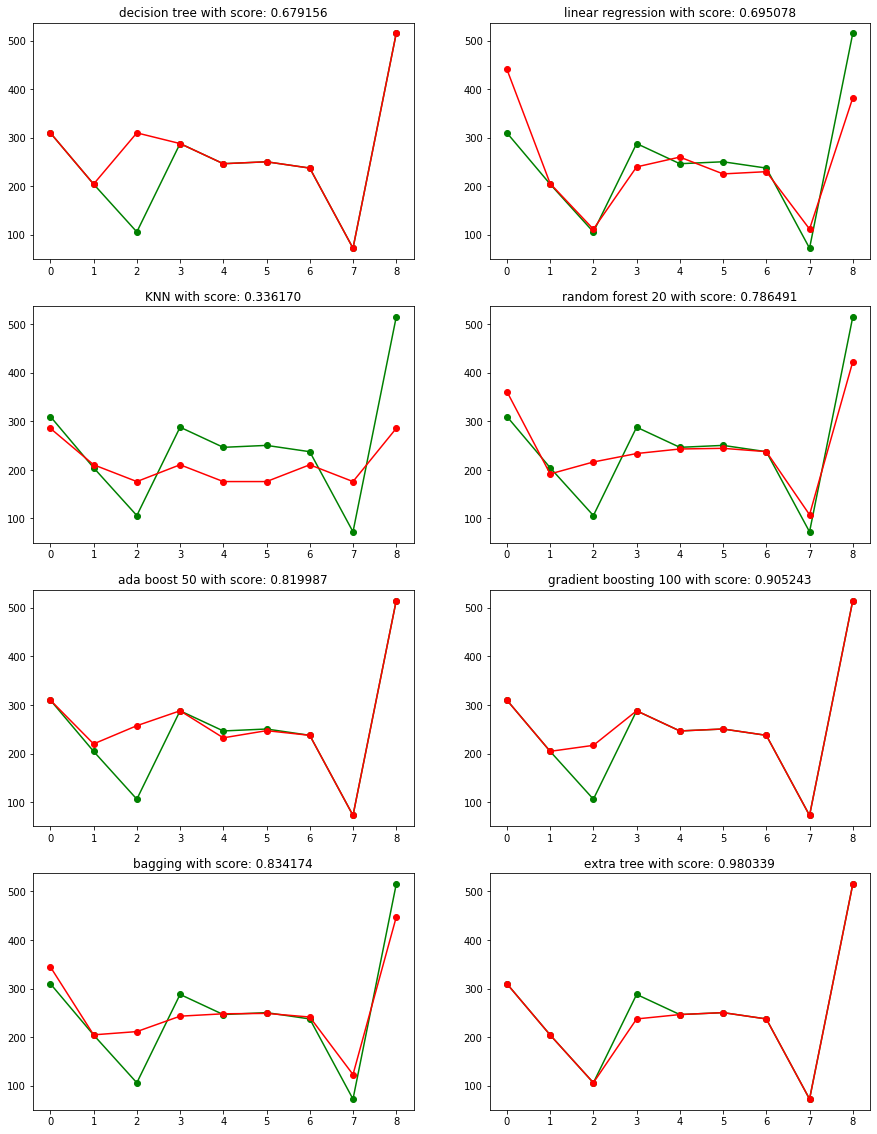

In [94]:
fig, ax = plt.subplots(4, 2, figsize = (15, 20))

for i in range(len(models)):
    models_df, result, score = try_different_method(models[i], model_names[i])
    ax[int(i/2), i%2].plot(np.arange(len(result)), y,'go-',label='true value')
    ax[int(i/2), i%2].plot(np.arange(len(result)),result,'ro-',label='predict value')
    ax[int(i/2), i%2].set_title(model_names[i] + ' with score: %f'%score)
models_df

### Aproach 2
Apply leave-one-out cross validation

In [17]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut

In [84]:
models = [tree.DecisionTreeRegressor(), 
          linear_model.LinearRegression(), 
          neighbors.KNeighborsRegressor(), 
          ensemble.RandomForestRegressor(n_estimators=20),
          ensemble.AdaBoostRegressor(n_estimators=50),
          ensemble.GradientBoostingRegressor(n_estimators=100),
          BaggingRegressor(),
          ExtraTreeRegressor()
         ]

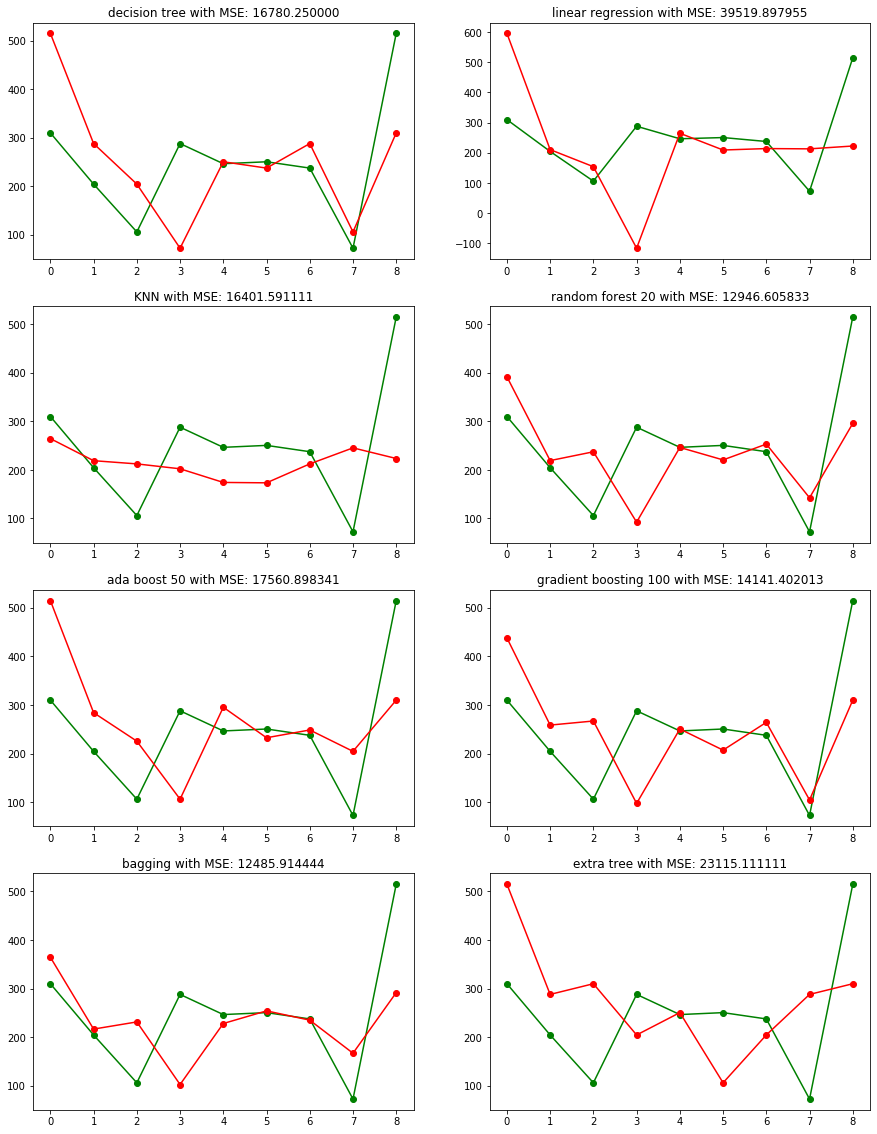

In [99]:
models_df2 = pd.DataFrame(columns = ["model", "MSE2_mean", "MSE2_sd"])

cv = LeaveOneOut()

all_pred_y = []
all_MSE = []
for i in range(len(models)):
    # every model
    pl = make_pipeline(preprocessing.StandardScaler(), models[i])
    pred_y = []
    mse = []
    for train_index, val_index in cv.split(x):
        train_x, train_y = x[train_index], y[train_index]
        val_x, val_y = x[val_index], y[val_index]
        
        pl.fit(train_x, train_y)
        result = pl.predict(val_x)     
        pred_y.extend(result)    
        mse.append(MSE(result,val_y))
    all_pred_y.append(pred_y)    
    all_MSE.append(mean(mse))
    models_df2 = models_df2.append({'model': model_names[i], 'MSE2_mean': mean(mse), 'MSE2_sd':std(mse)}, ignore_index=True) 
    
# visualization
fig, ax = plt.subplots(4, 2, figsize = (15, 20))
for i in range(len(models)):
    ax[int(i/2), i%2].plot(np.arange(num_of_runs), y,'go-',label='true value')
    ax[int(i/2), i%2].plot(np.arange(num_of_runs),all_pred_y[i],'ro-',label='predicted value')
    ax[int(i/2), i%2].set_title(model_names[i] + ' with MSE: %f'%all_MSE[i])    

In [100]:
models_df2

,model,MSE2_mean,MSE2_sd
0,decision tree,16780.250000,19163.753175
1,linear regression,39519.897955,54892.974547
2,KNN,16401.591111,25695.530508
3,random forest 20,12946.605833,17098.517186
4,ada boost 50,17560.898341,16355.289171
5,gradient boosting 100,14141.402013,15788.234005
6,bagging,12485.914444,17002.063569
7,extra tree,23115.111111,18697.622630


In [101]:
models_df.join(models_df2.set_index('model'), on='model')

# this can give us a general impression of how well different types of models perform．

,model,R^2,MSE,MSE2_mean,MSE2_sd
0,decision tree,0.679156,4624.000000,16780.250000,19163.753175
1,linear regression,0.695078,4394.532692,39519.897955,54892.974547
2,KNN,0.336170,9567.116667,16401.591111,25695.530508
3,random forest 20,0.786491,3077.094167,12946.605833,17098.517186
4,ada boost 50,0.819987,2594.349259,17560.898341,16355.289171
5,gradient boosting 100,0.905243,1365.639382,14141.402013,15788.234005
6,bagging,0.834174,2389.884722,12485.914444,17002.063569
7,extra tree,0.980339,283.361111,23115.111111,18697.622630
